# Laptop Dataset

<h2>Table of contents</h2>
<ol>
<li><a class='#data-acquisition'>Data Acquisition</a>
<li><a class='#data-Pre-Processing'>Data Pre-Processing</a>
<li><a class='#Explonatory-Data-Analysis'>Explonatory Data Analysis</a>
<li><a class='#Model-Developemetn '>Model Developement</a>
</ol>

# Data Acquisition

In [3]:
# Loading Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
# Loading file from csv to pandas dataframe
file = 'laptops.csv'
df = pd.read_csv(file)

In [5]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [7]:
# Modify decimals
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)

In [8]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Data Pre-Processing

## Handle missing value

In [9]:
#Check the missing values 
inventory_missing = df.isnull().sum()

df_missing = pd.DataFrame.from_dict([inventory_missing])
df_missing


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,0,0,0,0,0,0,4,0,0,0,5,0


In [10]:
#Repoted the missing values by True/False pairs
missing_value = df.isnull()
for column in missing_value.columns.values.tolist():
    print(missing_value[column].value_counts())


Unnamed: 0
False    238
Name: count, dtype: int64
Manufacturer
False    238
Name: count, dtype: int64
Category
False    238
Name: count, dtype: int64
Screen
False    238
Name: count, dtype: int64
GPU
False    238
Name: count, dtype: int64
OS
False    238
Name: count, dtype: int64
CPU_core
False    238
Name: count, dtype: int64
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
CPU_frequency
False    238
Name: count, dtype: int64
RAM_GB
False    238
Name: count, dtype: int64
Storage_GB_SSD
False    238
Name: count, dtype: int64
Weight_kg
False    233
True       5
Name: count, dtype: int64
Price
False    238
Name: count, dtype: int64


In [11]:
#Fill missing value in Screen_Size_cm column with the average of column
print(df['Screen_Size_cm'].isnull().sum())
avg_screen_size = df['Screen_Size_cm'].astype('float').mean()
df['Screen_Size_cm'].replace(np.nan, avg_screen_size, inplace = True)
print(df['Screen_Size_cm'].isnull().sum())

4
0


In [12]:
#Fill missing value in Weight_kg column with the frequent value in the column
freq_value = df['Weight_kg'].value_counts().idxmax()
df['Weight_kg'].replace(np.nan, freq_value, inplace = True)
df['Weight_kg'].isnull().sum()
    

0

In [13]:
freq = df['Weight_kg'].value_counts().idxmax()
freq

2.2

In [14]:
#Convert the data types of columns 
df[['Screen_Size_cm', 'Weight_kg']].astype('float')

,Screen_Size_cm,Weight_kg
0,35.56,1.60
1,39.62,2.20
2,39.62,2.20
3,33.78,1.22
4,39.62,1.91
...,...,...
233,35.56,1.70
234,33.78,1.20
235,30.48,1.36
236,39.62,2.40


## Data standardisation 

In [15]:
# five first rows of dataset
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [16]:
# Change the unit metric of Screen_Size_cm from cm to inch
df['Screen_Size_cm'] = df['Screen_Size_cm'] * 2.54
df.rename(columns = {'Screen_Size_cm':'Screen_Size_inch'}, inplace = True)

In [17]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,100.6348,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,100.6348,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,100.6348,1.8,8,256,1.91,837


In [18]:
df['Weight_kg'] = df['Weight_kg'] * 2.20462262
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace = True)

In [19]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,1.6,8,256,3.527396,978
1,1,Dell,3,Full HD,1,1,3,100.6348,2.0,4,256,4.850170,634
2,2,Dell,3,Full HD,1,1,7,100.6348,2.7,8,256,4.850170,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,1.6,8,128,2.689640,1244
4,4,HP,4,Full HD,2,1,7,100.6348,1.8,8,256,4.210829,837


## Data Normalization

Let normalize the CPU_frequency column by using simple feature scaling method

In [20]:

df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.527396,978
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.850170,634
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.850170,946
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.689640,1244
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.210829,837


## Data Binning

let categorize the price relied on low, meduim and high

In [21]:

bins = np.linspace(min(df['Price']), max(df['Price']), 4)
labels = ['Low', 'Medium', 'High']
df['Price_binned'] = pd.cut(df['Price'], bins, labels = labels, include_lowest = True) 

In [22]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.527396,978,Low
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.850170,634,Low
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.850170,946,Low
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.689640,1244,Low
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.210829,837,Low


we'll now plot our binned column over its frequency

Text(0.5, 1.0, 'Price bins')

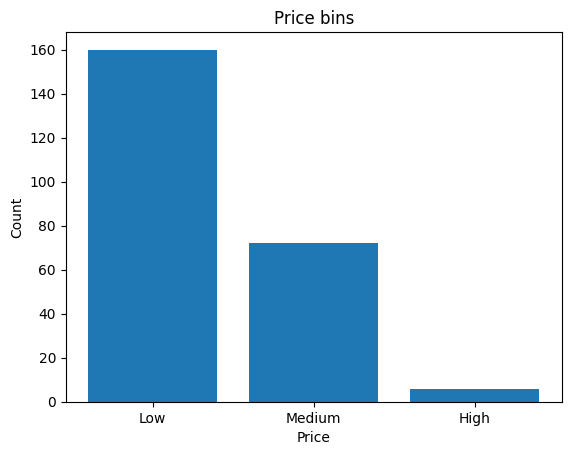

In [23]:

plt.bar(labels,df['Price_binned'].value_counts())
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price bins')         

## Indicator variable

turning categorical variable into quantitative variable in Screen column

In [24]:

dummies_variable = pd.get_dummies(df['Screen'])
dummies_variable.rename(columns={'Full HD':'Screen_Full-HD', 'IPS Panel':'Screen_IPS-Panel'}, inplace = True)
df = pd.concat([df, dummies_variable], axis = 1)
df.drop('Screen', axis = 1)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen_Full-HD,Screen_IPS-Panel
0,0,Acer,4,2,1,5,90.3224,0.551724,8,256,3.527396,978,Low,False,True
1,1,Dell,3,1,1,3,100.6348,0.689655,4,256,4.850170,634,Low,True,False
2,2,Dell,3,1,1,7,100.6348,0.931034,8,256,4.850170,946,Low,True,False
3,3,Dell,4,2,1,5,85.8012,0.551724,8,128,2.689640,1244,Low,False,True
4,4,HP,4,2,1,7,100.6348,0.620690,8,256,4.210829,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,90.3224,0.896552,8,256,3.747858,1891,Medium,False,True
234,234,Toshiba,3,2,1,5,85.8012,0.827586,8,256,2.645547,1950,Medium,True,False
235,235,Lenovo,4,2,1,5,77.4192,0.896552,8,256,2.998287,2236,Medium,False,True
236,236,Lenovo,3,3,1,5,100.6348,0.862069,6,256,5.291094,883,Low,True,False


In [25]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen_Full-HD,Screen_IPS-Panel
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.527396,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.850170,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.850170,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.689640,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.210829,837,Low,True,False


# Explonatory Data Analysis

In [26]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen_Full-HD,Screen_IPS-Panel
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.527396,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.850170,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.850170,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.689640,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.210829,837,Low,True,False


In [27]:
#Showing types of variables in dataset
df.dtypes.to_frame()


,0
Unnamed: 0,int64
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_inch,float64
CPU_frequency,float64
RAM_GB,int64


In [28]:
# Correlations between the variables 
df.select_dtypes(include=np.number).corr()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
Unnamed: 0,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.164915,0.424423,0.089017,-0.124216,-0.167202,0.321933
Category,0.028451,1.000000,-0.114174,-0.043378,0.232425,-0.305028,-0.053414,0.030127,0.038246,-0.379279,0.286243
GPU,0.022852,-0.114174,1.000000,-0.199549,0.145388,0.153095,0.291439,0.218973,0.094288,0.253589,0.288298
OS,-0.092529,-0.043378,-0.199549,1.000000,0.016954,0.150751,0.050407,-0.074625,0.007751,0.141246,-0.221730
CPU_core,-0.037261,0.232425,0.145388,0.016954,1.000000,0.037326,0.242722,0.473075,0.400015,0.070245,0.459398
Screen_Size_inch,-0.164915,-0.305028,0.153095,0.150751,0.037326,1.000000,-0.002268,0.017694,0.116416,0.802135,-0.126582
CPU_frequency,0.424423,-0.053414,0.291439,0.050407,0.242722,-0.002268,1.000000,0.226736,0.035557,0.061260,0.366666
RAM_GB,0.089017,0.030127,0.218973,-0.074625,0.473075,0.017694,0.226736,1.000000,0.361469,0.057822,0.549297
Storage_GB_SSD,-0.124216,0.038246,0.094288,0.007751,0.400015,0.116416,0.035557,0.361469,1.000000,0.116230,0.243421
Weight_pounds,-0.167202,-0.379279,0.253589,0.141246,0.070245,0.802135,0.061260,0.057822,0.116230,1.000000,-0.058815


## Continuous Valued Features

(0.0, 3974.15)

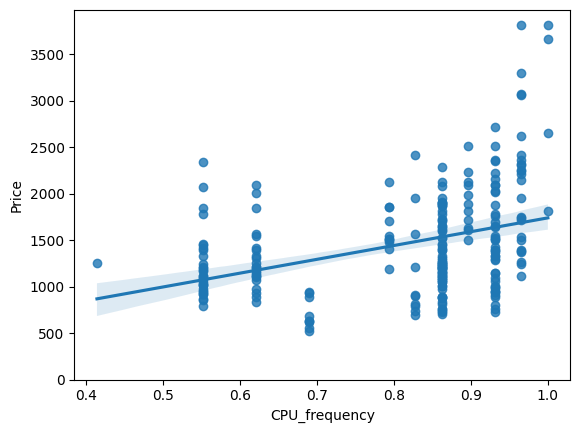

In [29]:
# Let check some linear relationship between variables using regplot from seaborn method
sns.regplot(x = df[['CPU_frequency']], y = df[['Price']])
plt.ylim(0,)


(0.0, 3974.15)

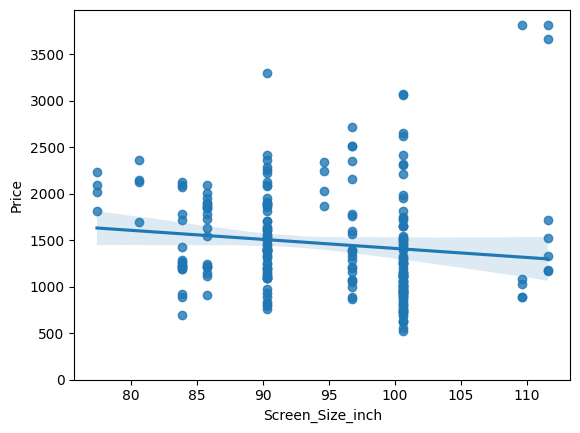

In [30]:
sns.regplot(x = df[['Screen_Size_inch']], y = df[['Price']])
plt.ylim(0,)

(0.0, 3974.15)

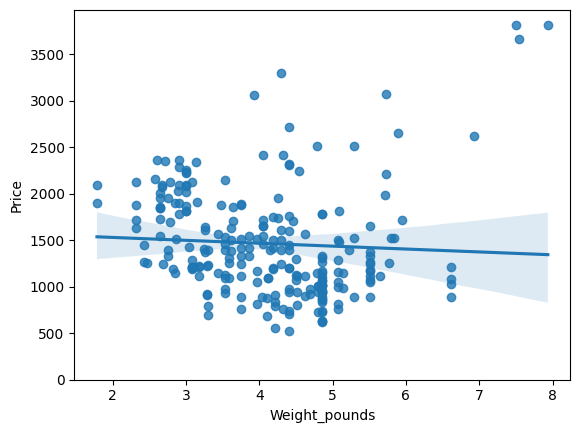

In [31]:
	
sns.regplot(x = df[['Weight_pounds']], y = df[['Price']])
plt.ylim(0,)

In [32]:
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds' ]:
    print(df[[param, 'Price']].corr() )

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.126582
Price                    -0.126582  1.000000
               Weight_pounds     Price
Weight_pounds       1.000000 -0.058815
Price              -0.058815  1.000000


Interpretation : 'CPU_frequency' has a 36% positive correlation with the laptops price. The other two parameters have a week correlation with the price.

## Categorical Features

<Axes: xlabel='Category', ylabel='Price'>

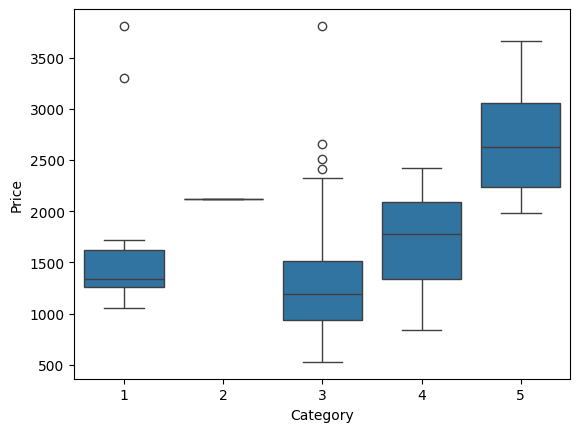

In [33]:
# Category Box plot
sns.boxplot(x = df['Category'], y = df['Price'])

Unnamed: 0             int64
Manufacturer          object
Category               int64
Screen                object
GPU                    int64
OS                     int64
CPU_core               int64
Screen_Size_inch     float64
CPU_frequency        float64
RAM_GB                 int64
Storage_GB_SSD         int64
Weight_pounds        float64
Price                  int64
Price_binned        category
Screen_Full-HD          bool
Screen_IPS-Panel        bool
dtype: object

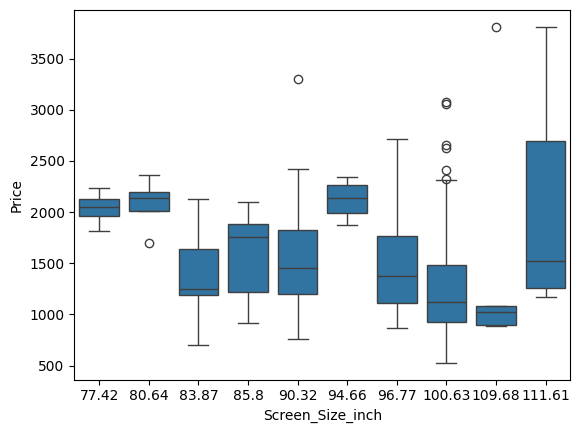

In [34]:
# Screen Size inch plot
sns.boxplot(x = np.round(df['Screen_Size_inch'], 2),y= df['Price'])
df.dtypes

<Axes: xlabel='GPU', ylabel='Price'>

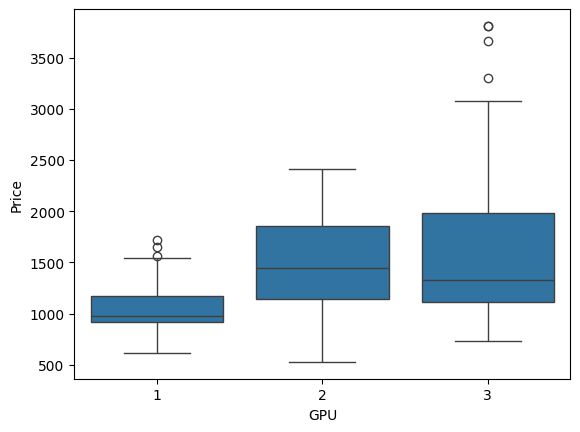

In [35]:
# we will plot now GPU column correlated with price
sns.boxplot(x = np.round(df['GPU'], 2),y= df['Price'])

<Axes: xlabel='OS', ylabel='Price'>

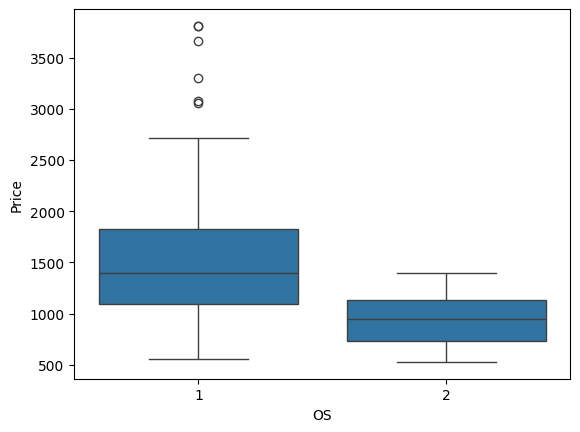

In [36]:
sns.boxplot(x = np.round(df['OS'], 2),y= df['Price'])

<Axes: xlabel='CPU_core', ylabel='Price'>

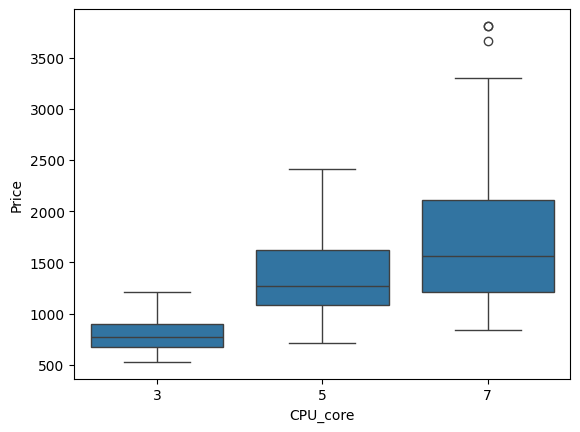

In [37]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

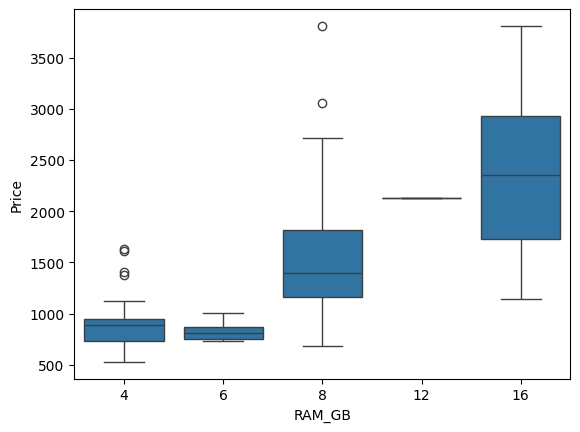

In [38]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

## Descriptive Statistical Analysis

In [39]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0    Category         GPU          OS    CPU_core  \
count  238.000000  238.000000  238.000000  238.000000  238.000000   
mean   118.500000    3.205882    2.151261    1.058824    5.630252   
std     68.848868    0.776533    0.638282    0.235790    1.241787   
min      0.000000    1.000000    1.000000    1.000000    3.000000   
25%     59.250000    3.000000    2.000000    1.000000    5.000000   
50%    118.500000    3.000000    2.000000    1.000000    5.000000   
75%    177.750000    4.000000    3.000000    1.000000    7.000000   
max    237.000000    5.000000    3.000000    2.000000    7.000000   

       Screen_Size_inch  CPU_frequency      RAM_GB  Storage_GB_SSD  \
count        238.000000     238.000000  238.000000      238.000000   
mean          94.660373       0.813822    7.882353      245.781513   
std            7.480426       0.141860    2.482603       34.765316   
min           77.419200       0.413793    4.000000      128.000000   
25%           90.322400     

## Group by and Pivot table


In [40]:
df_group = df[['Manufacturer', 'CPU_core', 'Price']]
grouped_test1 = df_group.groupby(['Manufacturer', 'CPU_core'], as_index=False).mean()
grouped_test1

,Manufacturer,CPU_core,Price
0,Acer,3,803.250000
1,Acer,5,1138.444444
2,Acer,7,1136.166667
3,Asus,3,630.000000
4,Asus,5,1165.857143
5,Asus,7,1607.444444
6,Dell,3,781.000000
7,Dell,5,1374.368421
8,Dell,7,1751.758621
9,HP,3,788.000000


In [41]:
group_pivot = grouped_test1.pivot(index='Manufacturer', columns='CPU_core')
group_pivot

Price                          
CPU_core           3            5            7
Manufacturer                                  
Acer          803.25  1138.444444  1136.166667
Asus          630.00  1165.857143  1607.444444
Dell          781.00  1374.368421  1751.758621
HP            788.00  1275.545455  1661.954545
Huawei           NaN  1714.000000          NaN
Lenovo        819.60  1406.517241  1819.666667
MSI              NaN  1365.666667  1714.000000
Razer            NaN          NaN  3301.000000
Samsung          NaN  1904.000000  2158.250000
Toshiba          NaN  1655.083333  1821.000000
Xiaomi           NaN  1188.000000          NaN

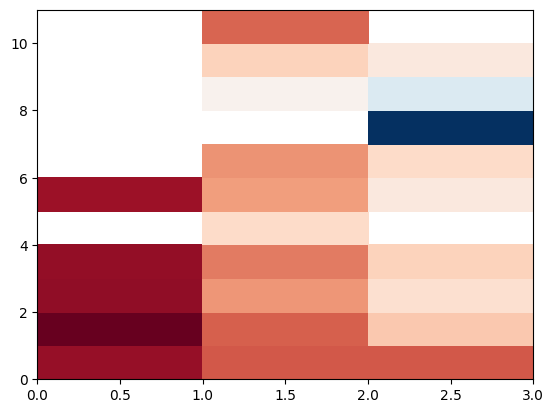

In [42]:
# plotting pivot table using heat map pcolor plot

plt.pcolor(group_pivot, cmap='RdBu')

C:\Users\taouf\AppData\Local\Temp\ipykernel_14568\2676274991.py:16: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


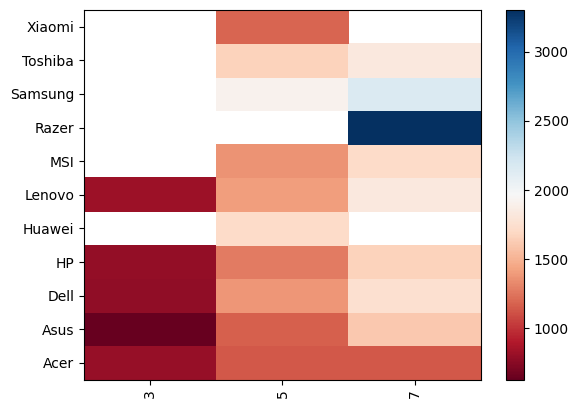

In [43]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap = 'RdBu')

#label names 
row_label = group_pivot.columns.levels[1]
col_label = group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_label, minor=False)
ax.set_yticklabels(col_label, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()



## Correlation and Causation

In [44]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen_Full-HD,Screen_IPS-Panel
0,0,Acer,4,IPS Panel,2,1,5,90.3224,0.551724,8,256,3.527396,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,100.6348,0.689655,4,256,4.850170,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,100.6348,0.931034,8,256,4.850170,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,85.8012,0.551724,8,128,2.689640,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,100.6348,0.620690,8,256,4.210829,837,Low,True,False


In [45]:
from scipy import stats

Let calculate the Pearson correlation and P-value of 'GPU' and 'Price'

In [46]:
pearson_coef, p_value = stats.pearsonr(df['GPU'], df['Price'])
print('The Pearson correlation coefficient is ', pearson_coef, ' with a p-value with P = ', p_value)

The Pearson correlation coefficient is  0.28829819888814273  with a p-value with P =  6.166949698364264e-06


#### Conclusion
<p>Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is week (~0.28, close to 0).</p>

In [47]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", "{:.10f}".format(p_value), '\n')

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857842  with a P-value of P = 0.0000000000 

CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 0.0000000055 

Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.0001489892 

Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.12658216275628928  with a P-value of P = 0.0511301753 

Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05881533811497595  with a P-value of P = 0.3663327156 

CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 0.0000000000 

OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827398  with a P-value of P = 0.0005696643 

GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  with a P-value of P = 0.0000061669 

Category

# Model Developement

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Create linear Regression object
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df[['Price']]

lm.fit(X,Y)


LinearRegression()

In [50]:
# We want to look how CPU-frequency can help us predict laptops price using simple linear regression 
Y_hat = lm.predict(X)
Y_hat[:5]

array([[1073.07834392],
       [1277.93263722],
       [1636.42765051],
       [1073.07834392],
       [1175.50549057]])

In [51]:
# The value of intercept 
lm.intercept_

array([253.66117069])

In [52]:
# The value of slope
lm.coef_

array([[1485.19362648]])

### What is the final estimated linear model we get?

In [53]:
# we should get a final linear model with the structure : yhat = a + bx

estimated_lm = lm.intercept_ + lm.coef_ * df[['CPU_frequency']]

# This The first 5 rows 
estimated_lm.head()

,CPU_frequency
0,1073.078344
1,1277.932637
2,1636.427651
3,1073.078344
4,1175.505491


C:\Users\taouf\AppData\Local\Temp\ipykernel_14568\3028333850.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Price'], hist=False, color="r", label = 'Actual Value')
C:\Users\taouf\AppData\Local\Temp\ipykernel_14568\3028333850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

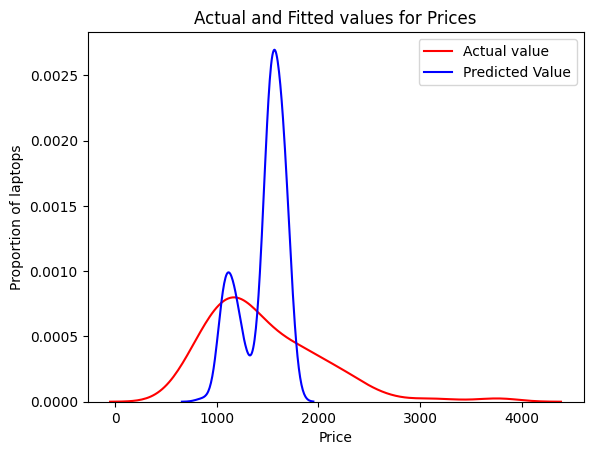

In [54]:
# Generate the Distribution plot for the predicted values and that of the actual value
ax = sns.distplot(df['Price'], hist=False, color="r", label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Fitted Values', ax  =ax)

plt.title('Actual and Fitted values for Prices')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(["Actual value", "Predicted Value"])
plt.show()

As we can see in this distributions the fitted values is not reasonably close to the actual values, since the two are rarely overlapping 

In [55]:
# Let get the parameters with a good p-value which means less than 0.01

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    coeffecient_corr , p_v =  stats.pearsonr(df[param], df['Price'])
    if p_v < 0.01:
        print(param, '{:.10f}'.format(p_v))

RAM_GB 0.0000000000
CPU_frequency 0.0000000055
Storage_GB_SSD 0.0001489892
CPU_core 0.0000000000
OS 0.0005696643
GPU 0.0000061669
Category 0.0000072257


A parameter which have a low enough p-value so as to indicate a strong relationship with the price are 'RAM_GB', "CPU_frequency", 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category', let create a multiple linear regression model.

In [56]:
mlr = LinearRegression()
Z = df[['RAM_GB', "CPU_frequency", 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
mlr.fit(Z, Y)

# list the predicted value
mYhat = mlr.predict(Z)
mYhat[:10]

array([[1345.51622771],
       [ 710.44905496],
       [1552.37242687],
       [1295.00681012],
       [1543.13847022],
       [1056.42067418],
       [1252.02084839],
       [ 806.98504446],
       [1007.51446753],
       [1449.64309091]])

In [57]:
# value of intercept
print(mlr.intercept_)

[-841.99132591]


In [58]:
# value of slope
print(mlr.coef_)

[[ 8.68089292e+01  9.61283977e+02  3.94604825e-01  6.56633979e+01
  -4.27445318e+02  9.78000871e+01  1.91295466e+02]]


In [59]:
# Let calculate final linear function with the structure mYhat = a + b_1*x_1 + b_2*x_2 + b_3 * x_3
# 'RAM_GB', "CPU_frequency", 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category'

estimated_mlr = mlr.intercept_ + df["RAM_GB"]*mlr.coef_[0,0] + df["CPU_frequency"] *mlr.coef_[0,1] + df['Storage_GB_SSD'] *mlr.coef_[0,2] + df['CPU_core'] *mlr.coef_[0,3] + df['OS'] *mlr.coef_[0,4] + df['GPU'] *mlr.coef_[0,5] + df['Category'] *mlr.coef_[0,6]
estimated_mlr


0      1345.516228
1       710.449055
2      1552.372427
3      1295.006810
4      1543.138470
          ...     
233    1808.320257
234    1419.402548
235    1676.993461
236    1376.732500
237    1386.254825
Length: 238, dtype: float64

C:\Users\taouf\AppData\Local\Temp\ipykernel_14568\3364354893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_mlr = sns.distplot(df['Price'], hist = False, label = 'Actual Value')
C:\Users\taouf\AppData\Local\Temp\ipykernel_14568\3364354893.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

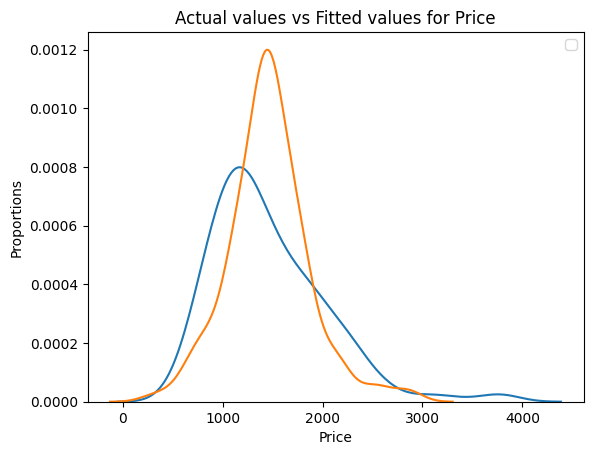

In [60]:
ax_mlr = sns.distplot(df['Price'], hist = False, label = 'Actual Value')
sns.distplot(mYhat, hist = False, label= 'Fitted Values', ax = ax_mlr)

plt.title('Actual values vs Fitted values for Price')
plt.xlabel('Price')
plt.ylabel('Proportions')
plt.legend('Actual value', 'Predicted value')
plt.show()

## Polynomial  Regression

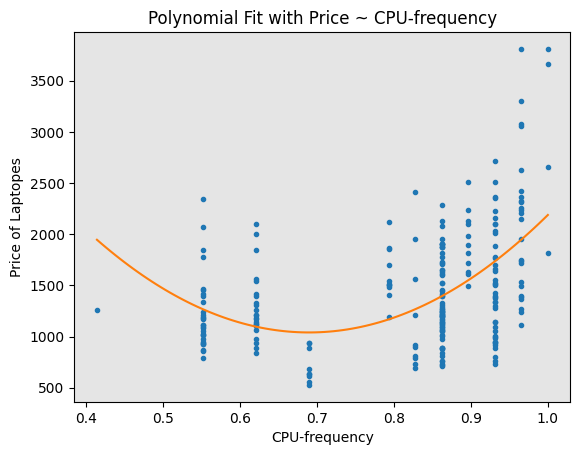

In [61]:
def PlotPolly(model, independent_var, dependent_var, Name):
    x_new = np.linspace(independent_var.min(), independent_var.max(), 100)
    y_new = model(x_new)
    plt.plot(independent_var, dependent_var, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit with Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Laptopes')

# Let fit the Polynomial using polyfit and poly1d from numpy

x = df['CPU_frequency']
y = df['Price']

f = np.polyfit(x, y ,2)
p = np.poly1d(f)
PlotPolly(p, x,y, "CPU-frequency")



We can Perform a polynomial transoform on multiple features.

In [62]:
# First we import the module 
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [63]:
Z_pr = pr.fit_transform(Z)
Z_pr.shape

(238, 36)

### Pipline

let simplify the steps of processing the data 

In [64]:
# let import the module from sklearn

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Then, we will create a list of tuples including the name of modele and estimors and its corresponding constructor

In [65]:
Input = [('scale', StandardScaler()),('Polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
Z = Z.astype('float')
Z.dtypes

RAM_GB            float64
CPU_frequency     float64
Storage_GB_SSD    float64
CPU_core          float64
OS                float64
GPU               float64
Category          float64
dtype: object

In [67]:
ypipe = pipe.fit(Z, y)
ypipe.predict(Z)[:4]

array([1475.  ,  775.25, 1274.  ,  965.  ])

## Measures for in-simple evaluation

### Simple linear regression

Let calculate the R squared

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
lm.fit(X,Y)

print(lm.score(X,Y))



0.1344436321024326


we can say that ~ 13% of the variation of the price is explained by the simple linear model 'CPU_frequency'